# Setting

In [1]:
from pf_utils import BacktestManager, DataManager, StaticPortfolio, MomentumPortfolio, AssetEvaluator, metrics
from pf_widgets import WidgetUniverse, WidgetTransaction

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
metrics2 = [
    'total_return', 'cagr', 'monthly_vol', 'monthly_sharpe',
    'max_drawdown', 'avg_drawdown','avg_drawdown_days', 
]

path_data = 'data'
path_tran = 'transaction'

# Universe

In [3]:
WidgetUniverse

In [4]:
# universe and file
uv_k200 = ['kospi200', 'kospi200_prices.csv']
uv_etf  = ['etf', 'etfs_all.csv']
uv_irp  = ['fund', 'funds_irp.csv']
uv_hana = ['fund', 'funds_kebhana.csv']

## KOSPI200

In [5]:
k200 = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], uv_k200))
)
k200.upload()

200 assets from 2021-01-04 to 2024-09-27 uploaded.
df_prices updated


In [6]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=k200.df_prices.columns
)
k200.download(**kw) if WidgetUniverse.values(0) else None

In [7]:
df_k200 = k200.df_prices
assetnames_k200 = k200.get_names()

## ETF

In [8]:
etf = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], uv_etf)))
etf.upload()

893 assets from 2021-01-04 to 2024-09-27 uploaded.
df_prices updated


In [9]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=etf.df_prices.columns
)
etf.download(**kw) if WidgetUniverse.values(0) else None

In [10]:
choice = ['069500', '273130', '148070', '379800', '411060', '284430']
df_etf = etf.df_prices[choice]
assetnames_etf = etf.get_names(tickers=choice)
assetnames_etf

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 148070: KOSEF 국고채10년
3) 379800: KODEX 미국S&P500TR
4) 411060: ACE KRX금현물
5) 284430: KODEX 200미국채혼합

## IRP - FUNDS
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8325&fundcode=8335
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8370&fundcode=8380
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537380&childFundGb=2&childFundCd=53738P
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537400&childFundGb=2&childFundCd=53740P
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537410&childFundGb=2&childFundCd=53741P
- https://www.hanwhawm.com/main/finance/fundInfo/FI141_2.cmd?p=500&item_cd=5102896

In [13]:
irp = DataManager(
    upload_type = 'rate',
    path = path_data,
    **dict(zip(['universe', 'file'], uv_irp))
)
irp.upload()
df = irp.check_days_in_year(252)

Estimating price from "data/funds_irp.csv" ...
Max error of 14 conversions: 0.16 %
14 assets from 2017-07-31 to 2024-08-26 uploaded.
df_prices updated


In [14]:
irp.convert_to_daily(True)

REMINDER: data converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [15]:
df_irp = irp.df_prices
assetnames_irp = irp.get_names()

import pandas as pd
df_an = pd.Series(assetnames_irp).to_frame('name')

In [16]:
irp.get_date_range().sort_values('end date').join(df_an)

,start date,end date,name
K55223BT1450,2017-07-31,2024-07-31,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e
K55105BS5067,2017-07-31,2024-07-31,삼성한국형TDF2040증권투자신탁H[주식혼합-재간접형]C-Pe
K55210BU2435,2017-08-31,2024-07-31,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re)
KR5223AE3357,2017-08-31,2024-07-31,kb퇴직연금배당증권자투자신탁(주식)C-E
K55365BT3694,2017-08-31,2024-07-31,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
K55207BU0715,2017-08-31,2024-07-31,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe
K55203C53681,2018-04-30,2024-07-31,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
K55213C51890,2018-05-31,2024-07-31,한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)
K55234CJ0997,2019-01-31,2024-07-31,IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re
K55301BU5479,2017-08-14,2024-08-25,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e


In [17]:
irp.performance('sharpe', 'year').join(df_an)

,daily_sharpe,monthly_sharpe,yearly_sharpe,name
K55301BU6139,0.953281,0.901074,0.59158,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
K55301BU5479,0.928838,0.890844,0.589447,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
K55365BT3694,0.640849,0.640538,0.573647,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
K55213C51890,0.749963,0.754216,0.542374,한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)
K55223BT1450,0.641399,0.641106,0.484719,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e
K55210BU2435,0.68767,0.689062,0.478562,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re)
K55203C53681,0.542176,0.539386,0.475771,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
K55206C96311,0.730614,0.628118,0.452722,키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
K55206C95800,0.778547,0.649921,0.439991,키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
K55207BU0715,0.468617,0.464831,0.417496,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe


## HANA - FUNDS
- https://dis.kofia.or.kr

In [18]:
hana = DataManager(
    upload_type = 'rate',
    path = path_data,
    **dict(zip(['universe', 'file'], uv_hana))
)
hana.upload()
hana.get_date_range()

Estimating price from "data/funds_kebhana.csv" ...
  error: -0.00 %
  error: 0.01 %
  error: -0.00 %
  error: 0.00 %
4 assets from 2010-01-29 to 2024-07-31 uploaded.
df_prices updated


,start date,end date
KR5101888398,2010-01-29,2024-07-31
KR5370AP9956,2014-04-30,2024-07-31
KR5236AS4826,2014-05-30,2024-07-31
K55306CV9946,2019-10-31,2024-07-31


In [19]:
hana.check_days_in_year(12)

KR5101888398    12.0
KR5236AS4826    12.0
KR5370AP9956    12.0
K55306CV9946    12.0
dtype: float64

In [20]:
hana.convert_to_daily(True)

KR5101888398: 12
KR5236AS4826: 12
KR5370AP9956: 12
K55306CV9946: 12
REMINDER: data converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [21]:
df_hana = hana.df_prices
assetnames_hana = hana.get_names()
assetnames_hana

0) KR5101888398: 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)
1) KR5236AS4826: 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E
2) KR5370AP9956: AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce
3) K55306CV9946: 다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce

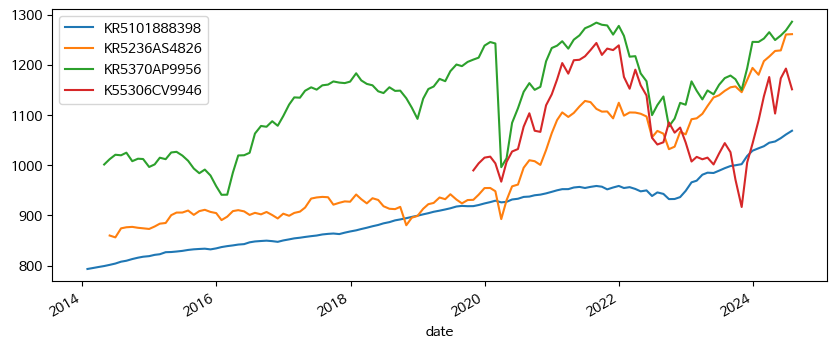

In [23]:
_ = df_hana.loc['2014':].plot(figsize=(10,4))

# Backtest

## KOSPI 200

In [15]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246,
    asset_names = assetnames_k200
)
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [16]:
lags = dict(lookback=12, lag=5)

In [17]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [18]:
select = 'Momentum'
kwargs_build = dict(
    name=f'KOSPI:{select}', select =select,
    freq='M', weigh = 'ERC',
    n_assets=5, **lags
)
bm.build(**kwargs_build)

In [29]:
select = 'K-ratio'
kwargs_build.update(dict(
    name=f'KOSPI:{select}', select =select,
))
bm.build(**kwargs_build)

In [19]:
select = 'Momentum'
n_assets = 10
kwargs_build = dict(
    name=f'KOSPI:{select}_{n_assets}', select =select,
    freq='M', weigh = 'ERC',
    n_assets=n_assets, **lags
)
bm.build(**kwargs_build)

Backtesting 3 strategies: KODEX200, KOSPI:Momentum, KOSPI:Momentum_10


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.18it/s]

Returning stats


,KOSPI:Momentum,KOSPI:Momentum_10,KODEX200
start,2021-01-03,2021-01-03,2021-01-03
end,2024-08-23,2024-08-23,2024-08-23
total_return,4.681265,2.168628,0.002629
cagr,0.612504,0.373278,0.000722
calmar,2.197839,1.339425,0.002597
max_drawdown,-0.278685,-0.278685,-0.278165
avg_drawdown,-0.064276,-0.050644,-0.078234
avg_drawdown_days,17.6,25.65625,157.166667
daily_vol,0.399865,0.299541,0.156325
daily_sharpe,1.417141,1.229812,0.083251


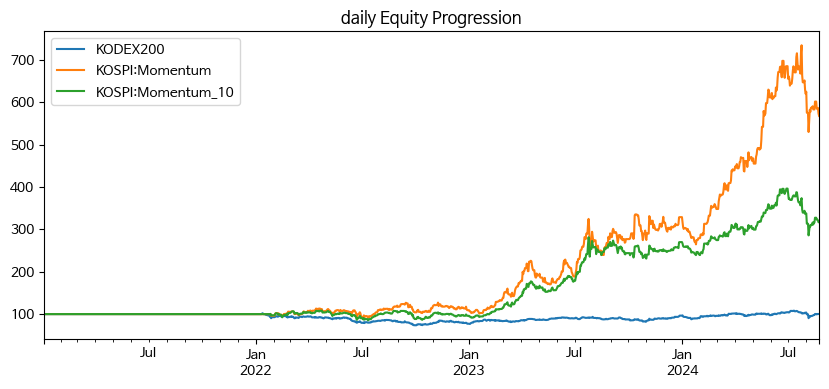

In [20]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [21]:
df_pf = bm.get_historical()
df_pf = df_pf[['KODEX200','KOSPI:Momentum']]

## ETF

In [38]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 245,
    asset_names = assetnames_etf
)
bm = BacktestManager(df_etf, **kwargs_bm)

period reset: 2021-12-15 ~ 2024-07-18
running self.util_check_days_in_year to check days in a year


In [39]:
lags = dict(lookback=12, lag=5)

In [40]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [41]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='ETF:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='ETF:ERC', weigh='ERC', **kwargs_build)
bm.build(name='ETF:InvVol', weigh='InvVol', **kwargs_build)

In [42]:
kwargs_build = dict(
    weigh='InvVol',  select = 'all',  **lags
)

bm.build(name='ETF:Eqaully(Q)', freq = 'Q', **kwargs_build)
bm.build(name='ETF:Eqaully(M)', freq = 'M', **kwargs_build)

Backtesting 6 strategies: KODEX200, ETF:Eqaully, ... , ETF:Eqaully(M)


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.79it/s]


Returning stats


,ETF:Eqaully,ETF:ERC,ETF:Eqaully(M),ETF:Eqaully(Q),ETF:InvVol,KODEX200
start,2021-12-14,2021-12-14,2021-12-14,2021-12-14,2021-12-14,2021-12-14
end,2024-07-18,2024-07-18,2024-07-18,2024-07-18,2024-07-18,2024-07-18
total_return,0.270048,0.224691,0.20629,0.202248,0.198584,0.319442
cagr,0.096586,0.081312,0.075017,0.073626,0.072363,0.112842
calmar,2.627234,2.112785,2.004658,1.991795,1.918062,0.895283
max_drawdown,-0.036763,-0.038486,-0.037421,-0.036965,-0.037727,-0.126041
avg_drawdown,-0.007541,-0.007283,-0.006064,-0.00668,-0.006697,-0.02551
avg_drawdown_days,12.216216,16.740741,15.0,16.851852,16.888889,19.192308
daily_vol,0.046106,0.040436,0.038918,0.038857,0.038869,0.125859
daily_sharpe,2.071368,2.000378,1.923199,1.891992,1.860437,0.932876


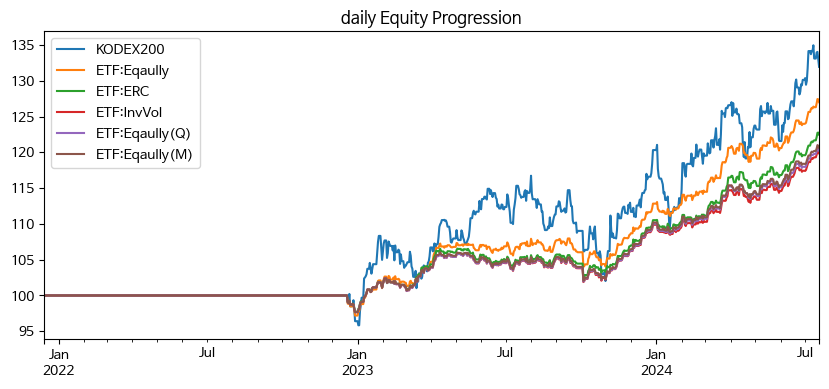

In [43]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [44]:
df = bm.get_historical()
df_pf = df_pf.join(df[['ETF:Eqaully', 'ETF:ERC']])

NameError: name 'df_pf' is not defined

## IRP

In [22]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 365,
    asset_names = assetnames_irp
)

lags = dict(lookback=12, lag=5)

### My portfolio

In [306]:
choice_mp = ['K55301BU6139', 'K55206C95800']
irp.get_names(choice_mp)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)

In [307]:
bm = BacktestManager(df_irp, **kwargs_bm)

period reset: 2019-01-31 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


In [308]:
bm.benchmark_ticker()

Benchmark is KODEX200


In [309]:
choice = choice_mp

kwargs_build = dict(
    # equal weights for choice, zero weights for the rest of the assets
    weigh='Specified', weights=choice,
    select ='all'
)
bm.build(name='MP:Quarterly', freq='Q', **kwargs_build)
bm.build(name='MP:Yearly', freq='Y', **kwargs_build)

In [310]:
bm.run(plot=False, stats_sort_by='monthly_sharpe', metrics=metrics2)

Backtesting 3 strategies: KODEX200, MP:Quarterly, MP:Yearly


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.82it/s]

Returning stats


,MP:Yearly,MP:Quarterly,KODEX200
start,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31
total_return,0.5097,0.509769,0.487812
cagr,0.077764,0.077773,0.074906
monthly_vol,0.103181,0.103205,0.19921
monthly_sharpe,0.779885,0.779812,0.461712
max_drawdown,-0.215629,-0.21565,-0.346184
avg_drawdown,-0.014143,-0.014135,-0.047368
avg_drawdown_days,28.912281,28.912281,68.357143


### Weight

In [311]:
bm.benchmark_ticker(name='LAG:KODEX200', **lags)

Benchmark is LAG:KODEX200


In [312]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

choice = choice_mp
bm.build(name='LAG:MP', weigh='Specified', weights=choice, **kwargs_build)

In [313]:
bm.build(name='LAG:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='LAG:ERC', weigh='ERC', **kwargs_build)
bm.build(name='LAG:InvVol', weigh='InvVol', **kwargs_build)
bm.build(name='LAG:MeanVar', weigh='MeanVar', **kwargs_build)

In [314]:
bm.portfolios

0) KODEX200
1) MP:Quarterly
2) MP:Yearly
3) LAG:KODEX200
4) LAG:MP
5) LAG:Eqaully
6) LAG:ERC
7) LAG:InvVol
8) LAG:MeanVar

In [315]:
pf_list = list(bm.portfolios.keys())[3:]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=metrics2)

Backtesting 6 strategies: LAG:KODEX200, LAG:MP, ... , LAG:MeanVar


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.60it/s]

Returning stats


,LAG:MP,LAG:Eqaully,LAG:ERC,LAG:InvVol,LAG:KODEX200,LAG:MeanVar
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.320584,0.355465,0.310493,0.301408,0.435671,0.218928
cagr,0.051856,0.056853,0.05039,0.049062,0.067957,0.036648
monthly_vol,0.099719,0.119832,0.105256,0.104687,0.189682,0.10127
monthly_sharpe,0.558104,0.522481,0.520792,0.510908,0.440919,0.406259
max_drawdown,-0.215628,-0.204365,-0.185794,-0.183714,-0.342786,-0.189489
avg_drawdown,-0.018684,-0.012366,-0.011598,-0.011269,-0.052,-0.014114
avg_drawdown_days,39.333333,35.45,29.744681,32.627907,74.619048,41.828571


In [316]:
kwb = {**kwargs_build, 'freq':'Q'}

bm.build(name='LAG:Quarterly', weigh='equally', **kwb)

In [317]:
pf_list = list(bm.portfolios.keys())[3:]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=metrics2)

Backtesting 7 strategies: LAG:KODEX200, LAG:MP, ... , LAG:Quarterly


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.57it/s]

Returning stats


,LAG:MP,LAG:Eqaully,LAG:Quarterly,LAG:ERC,LAG:InvVol,LAG:KODEX200,LAG:MeanVar
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.320584,0.355465,0.354231,0.310493,0.301408,0.435671,0.218928
cagr,0.051856,0.056853,0.056678,0.05039,0.049062,0.067957,0.036648
monthly_vol,0.099719,0.119832,0.11947,0.105256,0.104687,0.189682,0.10127
monthly_sharpe,0.558104,0.522481,0.522332,0.520792,0.510908,0.440919,0.406259
max_drawdown,-0.215628,-0.204365,-0.204063,-0.185794,-0.183714,-0.342786,-0.189489
avg_drawdown,-0.018684,-0.012366,-0.012063,-0.011598,-0.011269,-0.052,-0.014114
avg_drawdown_days,39.333333,35.45,34.463415,29.744681,32.627907,74.619048,41.828571


### Select

In [318]:
n = 4
choice = irp.performance('sharpe', 'year').index[:n].to_list()
irp.get_names(choice)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
2) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
3) K55213C51890: 한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)

In [319]:
kwa_list = [{'name':f'SHP:Y{i}', 'weights':choice[:i]} for i in range(1,n+1)]

kwargs_build = dict(
    freq = 'Y', select = 'all', weigh='Specified'
)

bm.build_batch(*kwa_list, **kwargs_build)

In [320]:
bm.portfolios

0) KODEX200
1) MP:Quarterly
2) MP:Yearly
3) LAG:KODEX200
4) LAG:MP
5) LAG:Eqaully
6) LAG:ERC
7) LAG:InvVol
8) LAG:MeanVar
9) LAG:Quarterly
10) SHP:Y1
11) SHP:Y2
12) SHP:Y3
13) SHP:Y4

In [321]:
pf_list = [0, 2, 10, 11, 12, 13]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=metrics2)

Backtesting 6 strategies: KODEX200, MP:Yearly, ... , SHP:Y4


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.50it/s]

Returning stats


,SHP:Y1,SHP:Y2,SHP:Y4,SHP:Y3,MP:Yearly,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.618317,0.666064,0.682601,0.5097,0.487812
cagr,0.087514,0.091463,0.097249,0.099221,0.077764,0.074906
monthly_vol,0.099616,0.104922,0.122943,0.126855,0.103181,0.19921
monthly_sharpe,0.894809,0.889493,0.819295,0.811894,0.779885,0.461712
max_drawdown,-0.215077,-0.22212,-0.184672,-0.203328,-0.215629,-0.346184
avg_drawdown,-0.0116,-0.012311,-0.009163,-0.010896,-0.014143,-0.047368
avg_drawdown_days,20.853659,20.987805,22.973333,24.942857,28.912281,68.357143


In [322]:
n = 4
choice = irp.performance('sharpe', 'month').index[:n].to_list()
irp.get_names(choice)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
2) K55301BU5453: 미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e
3) K55213C51890: 한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)

In [323]:
kwa_list = [{'name':f'SHP:M{i}', 'weights':choice[:i]} for i in range(1,n+1)]

bm.build_batch(*kwa_list, **kwargs_build)

In [324]:
pf_list = [0, 2, 10, 14, 15, 16, 17]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=metrics2)

Backtesting 7 strategies: KODEX200, MP:Yearly, ... , SHP:M4


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]

Returning stats


,SHP:Y1,SHP:M1,SHP:M2,SHP:M3,SHP:M4,MP:Yearly,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.586372,0.618317,0.496902,0.524563,0.5097,0.487812
cagr,0.087514,0.087514,0.091463,0.076097,0.079685,0.077764,0.074906
monthly_vol,0.099616,0.099616,0.104922,0.089114,0.094304,0.103181,0.19921
monthly_sharpe,0.894809,0.894809,0.889493,0.869994,0.862908,0.779885,0.461712
max_drawdown,-0.215077,-0.215077,-0.22212,-0.191431,-0.157305,-0.215629,-0.346184
avg_drawdown,-0.0116,-0.0116,-0.012311,-0.010156,-0.008272,-0.014143,-0.047368
avg_drawdown_days,20.853659,20.853659,20.987805,20.890244,20.26506,28.912281,68.357143


In [325]:
choice = irp.performance('sharpe').idxmax().unique().tolist()
irp.get_names(choice)

0) K55301BU5453: 미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e
1) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e

In [326]:
bm.build(name='SHP:Y1M1', weights=choice, **kwargs_build)

In [327]:
pf_list = [0, 2, 10, 18]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=metrics2)

Backtesting 4 strategies: KODEX200, MP:Yearly, SHP:Y1, SHP:Y1M1


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.18it/s]

Returning stats


,SHP:Y1,SHP:Y1M1,MP:Yearly,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.423583,0.5097,0.487812
cagr,0.087514,0.066316,0.077764,0.074906
monthly_vol,0.099616,0.078857,0.103181,0.19921
monthly_sharpe,0.894809,0.85584,0.779885,0.461712
max_drawdown,-0.215077,-0.172359,-0.215629,-0.346184
avg_drawdown,-0.0116,-0.008916,-0.014143,-0.047368
avg_drawdown_days,20.853659,21.481013,28.912281,68.357143


### Candis

In [328]:
choice = choice_mp + ['K55365BT3694', 'K55203C53681', 'K55234CJ0997']
irp.get_names(choice)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
3) K55203C53681: 대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
4) K55234CJ0997: IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re

In [329]:
bm.build(name='CAN1', weights=choice, **kwargs_build)

In [330]:
pf_list = [0, 2, 10, 19]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=metrics2)

Backtesting 4 strategies: KODEX200, MP:Yearly, SHP:Y1, CAN1


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.28it/s]

Returning stats


,SHP:Y1,MP:Yearly,CAN1,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.5097,0.588888,0.487812
cagr,0.087514,0.077764,0.087828,0.074906
monthly_vol,0.099616,0.103181,0.128152,0.19921
monthly_sharpe,0.894809,0.779885,0.722651,0.461712
max_drawdown,-0.215077,-0.215629,-0.213511,-0.346184
avg_drawdown,-0.0116,-0.014143,-0.011399,-0.047368
avg_drawdown_days,20.853659,28.912281,35.333333,68.357143


In [331]:
choice = choice_mp + ['K55365BT3694']
bm.build(name='CAN2', weights=choice, **kwargs_build)

In [332]:
pf_list = [0, 2, 10, 19, 20]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=metrics2)

Backtesting 5 strategies: KODEX200, MP:Yearly, SHP:Y1, CAN1, CAN2


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.31it/s]

Returning stats


,SHP:Y1,MP:Yearly,CAN2,CAN1,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.5097,0.609242,0.588888,0.487812
cagr,0.087514,0.077764,0.090348,0.087828,0.074906
monthly_vol,0.099616,0.103181,0.126804,0.128152,0.19921
monthly_sharpe,0.894809,0.779885,0.748086,0.722651,0.461712
max_drawdown,-0.215077,-0.215629,-0.208847,-0.213511,-0.346184
avg_drawdown,-0.0116,-0.014143,-0.012401,-0.011399,-0.047368
avg_drawdown_days,20.853659,28.912281,31.339623,35.333333,68.357143


#### Weight

In [362]:
choice = choice_mp + ['K55365BT3694', 'K55213C51890', 'K55203C53681', 'K55234CJ0997']
irp.get_names(choice)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
3) K55213C51890: 한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)
4) K55203C53681: 대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
5) K55234CJ0997: IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re

In [363]:
df = df_irp[choice]
bm = BacktestManager(df, **kwargs_bm)

period reset: 2019-01-31 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


In [364]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [365]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='CAN3:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='CAN3:ERC', weigh='ERC', **kwargs_build)
bm.build(name='CAN3:InvVol', weigh='InvVol', **kwargs_build)
bm.build(name='CAN3:MeanVar', weigh='MeanVar', **kwargs_build)

In [366]:
bm.build(name='MP', weigh='Specified', weights=choice_mp, **kwargs_build)

In [367]:
choice = irp.performance('sharpe', 'year').index
bm.build(name=f'SHP:Y1', weigh='Specified', weights=choice[0], **kwargs_build)

In [368]:
bm.run(plot=False, stats_sort_by='monthly_sharpe', metrics=metrics2)

Backtesting 7 strategies: KODEX200, CAN3:Eqaully, ... , SHP:Y1


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.84it/s]

Returning stats


,SHP:Y1,CAN3:Eqaully,CAN3:ERC,MP,CAN3:InvVol,KODEX200,CAN3:MeanVar
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.375277,0.410699,0.36222,0.320584,0.35347,0.435671,0.239453
cagr,0.059645,0.064555,0.057809,0.051856,0.05657,0.067957,0.0398
monthly_vol,0.096018,0.121237,0.109432,0.099719,0.110411,0.189682,0.103302
monthly_sharpe,0.652645,0.577498,0.569288,0.558104,0.554492,0.440919,0.429649
max_drawdown,-0.21507,-0.196979,-0.183427,-0.215628,-0.181566,-0.342786,-0.195187
avg_drawdown,-0.014249,-0.012469,-0.012531,-0.018684,-0.011687,-0.052,-0.014138
avg_drawdown_days,25.714286,36.205128,34.121951,39.333333,32.55814,74.619048,41.542857


#### Value1

In [53]:
choice = ['K55365BT3694', 'K55203C53681', 'K55234CJ0997']
irp.get_names(choice)

0) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
1) K55203C53681: 대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
2) K55234CJ0997: IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re

In [54]:
df_v = df_pf['KOSPI:Momentum'].to_frame().join(df_irp[choice], how='outer')
bm = BacktestManager(df_v, **kwargs_bm)
bm.df_assets.head()

period reset: 2022-01-25 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


,KOSPI:Momentum,K55365BT3694,K55203C53681,K55234CJ0997
2022-01-25,100.000,1012.039352,1338.109236,1390.010967
2022-01-26,99.780,1012.039352,1338.109236,1390.010967
2022-01-27,96.064,1012.039352,1338.109236,1390.010967
2022-01-28,96.318,897.421767,1203.518615,1360.231095
2022-01-29,96.318,897.421767,1203.518615,1360.231095


In [55]:
bm.benchmark_ticker()

Benchmark is KODEX200


In [56]:
ew = lambda *l: [x for i,x in enumerate(bm.df_assets.columns) if i in l]

kwargs_build = dict(
    select = 'all', weigh='Specified'
)

hy = round(bm.days_in_year/2)
kwa_list = [
    {'name':f'VAL1:{f}{i}', 'freq':f if f != 'HY' else hy, 'weights':ew(0, i)} 
    for i in range(1,4) for f in ['Y', 'HY', 'Q', 'M']
]

bm.build_batch(*kwa_list, **kwargs_build)
bm.build(name='VAL:Momentum', freq='Once', weights=ew(0), **kwargs_build)

In [57]:
bm.run(plot=False, stats_sort_by='monthly_sharpe', metrics=metrics2)

Backtesting 14 strategies: KODEX200, VAL1:Y1, ... , VAL:Momentum


100%|███████████████████████████████████████████████████████████████| 14/14 [00:03<00:00,  3.77it/s]

Returning stats


,VAL1:M1,VAL:Momentum,VAL1:Q1,VAL1:HY1,VAL1:M2,VAL1:M3,VAL1:Q2,VAL1:HY2,VAL1:Q3,VAL1:HY3,VAL1:Y1,VAL1:Y2,VAL1:Y3,KODEX200
start,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,1.816207,5.202315,1.948988,2.275473,1.743892,1.663188,1.876178,2.216583,1.817629,2.177257,1.994999,1.929399,1.892298,0.105647
cagr,0.509093,1.065356,0.53698,0.602478,0.493571,0.475954,0.521784,0.590964,0.509396,0.583205,0.546466,0.532914,0.525168,0.040723
monthly_vol,0.299109,0.543153,0.316649,0.355989,0.304777,0.283343,0.322797,0.361163,0.305477,0.350819,0.35985,0.362872,0.350884,0.201805
monthly_sharpe,1.654736,1.642873,1.637335,1.607304,1.583744,1.576551,1.569953,1.559326,1.556125,1.529182,1.493624,1.450505,1.421477,0.318938
max_drawdown,-0.174774,-0.262851,-0.177392,-0.176973,-0.165838,-0.145682,-0.16868,-0.16879,-0.16052,-0.17093,-0.192837,-0.186211,-0.197747,-0.235302
avg_drawdown,-0.038191,-0.061554,-0.038592,-0.040179,-0.039565,-0.033912,-0.042578,-0.042454,-0.03392,-0.037747,-0.049821,-0.047745,-0.047972,-0.035817
avg_drawdown_days,21.189189,17.088889,22.571429,21.944444,22.055556,19.7,22.628571,21.27027,21.297297,20.205128,21.378378,21.916667,20.410256,51.588235


#### Value2

In [63]:
choice = ['K55365BT3694']
irp.get_names(choice)

0) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2

In [64]:
df_v = df_pf['KOSPI:Momentum'].to_frame().join(df_irp[choice], how='outer')
bm = BacktestManager(df_v, **kwargs_bm)
bm.df_assets.head()

period reset: 2022-01-25 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


,KOSPI:Momentum,K55365BT3694
2022-01-25,100.000,1012.039352
2022-01-26,99.780,1012.039352
2022-01-27,96.064,1012.039352
2022-01-28,96.318,897.421767
2022-01-29,96.318,897.421767


In [65]:
kwargs_build = dict(
    select = 'all', **lags
)

kwa_list = [
    {'name':f'VAL2:{f}', 'freq':f if f != 'HY' else hy} for f in ['Y', 'HY', 'Q', 'M']
]

bm.build_batch(*kwa_list, weigh='ERC', **kwargs_build)
bm.build(name='VAL2:Momentum', freq='Once', weights=ew(0), weigh='Specified', **kwargs_build)
bm.run(plot=False, stats_sort_by='monthly_sharpe', metrics=metrics2)

Backtesting 5 strategies: VAL2:Y, VAL2:HY, VAL2:Q, VAL2:M, VAL2:Momentum


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.33it/s]


Returning stats


,VAL2:Q,VAL2:M,VAL2:HY,VAL2:Momentum,VAL2:Y
start,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,1.367166,1.274549,1.529266,4.653043,1.477626
cagr,0.408428,0.386262,0.445997,0.990624,0.43419
monthly_vol,0.191406,0.186329,0.233586,0.515736,0.261045
monthly_sharpe,1.914088,1.873641,1.717047,1.592483,1.527195
max_drawdown,-0.123468,-0.120783,-0.146581,-0.26285,-0.170256
avg_drawdown,-0.0216,-0.018723,-0.025313,-0.055505,-0.034704
avg_drawdown_days,12.294118,11.527778,13.3125,12.228571,12.969697


In [49]:
df = bm.get_historical()
df_pf = df_pf.join(df['TDF2:Eqaully'])

## HANA

In [10]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 365,
    asset_names = assetnames_hana
)
bm = BacktestManager(df_hana, **kwargs_bm)

period reset: 2019-10-31 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


In [11]:
lags = dict(lookback=12, lag=5)

In [12]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [13]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='HANA:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='HANA:ERC', weigh='ERC', **kwargs_build)
bm.build(name='HANA:InvVol', weigh='InvVol', **kwargs_build)

In [14]:
kwargs_build = dict(
    weigh='InvVol',  select = 'all',  **lags
)

bm.build(name='HANA:InvVol(Q)', freq = 'Q', **kwargs_build)
bm.build(name='HANA:InvVol(M)', freq = 'M', **kwargs_build)

Backtesting 6 strategies: KODEX200, HANA:Eqaully, ... , HANA:InvVol(M)


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.16it/s]

Returning stats


,HANA:InvVol,HANA:InvVol(M),HANA:InvVol(Q),HANA:ERC,HANA:Eqaully,KODEX200
start,2019-10-30,2019-10-30,2019-10-30,2019-10-30,2019-10-30,2019-10-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.153301,0.128839,0.131496,0.180167,0.155502,0.317262
cagr,0.030463,0.025826,0.026333,0.035468,0.030877,0.05969
calmar,0.531545,0.397336,0.406434,0.434394,0.317349,0.174126
max_drawdown,-0.057311,-0.064998,-0.064791,-0.081649,-0.097296,-0.342796
avg_drawdown,-0.015045,-0.009759,-0.013248,-0.024826,-0.028437,-0.039924
avg_drawdown_days,128.166667,112.125,146.166667,172.0,177.8,87.133333
daily_vol,0.032006,0.032026,0.032686,0.046101,0.049326,0.153677
daily_sharpe,0.973311,0.828929,0.828294,0.7949,0.654115,0.46194


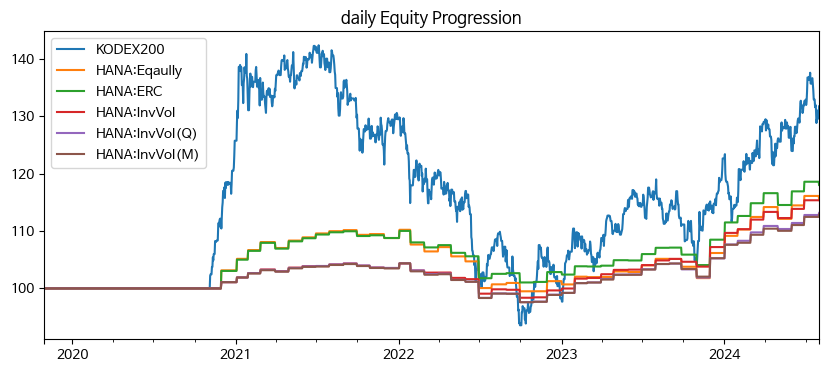

In [15]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [24]:
df = bm.get_historical()
df_pf = df_pf.join(df['HANA:InvVol'])

NameError: name 'df_pf' is not defined

## Summary

In [58]:
ae = AssetEvaluator(df_pf, 245)

ETF:Eqaully: 244
ETF:ERC: 244
TDF2:Eqaully: 246
HANA:InvVol: 246


In [59]:
ae.get_stats(sort_by='monthly_sharpe', align_period=False)

,ETF:Eqaully,ETF:ERC,KOSPI:Momentum,HANA:InvVol,TDF2:Eqaully,KODEX200
start,2022-12-19,2022-12-19,2022-01-25,2022-01-10,2022-01-10,2022-01-10
end,2024-07-15,2024-07-15,2024-07-15,2024-06-28,2024-06-14,2024-07-15
total_return,0.268406,0.221212,6.076125,0.105528,0.048404,0.073467
cagr,0.163337,0.135605,1.208567,0.041555,0.019678,0.02864
calmar,4.442957,3.523505,4.597925,0.725071,0.120567,0.10294
max_drawdown,-0.036763,-0.038486,-0.262851,-0.057311,-0.16321,-0.278222
avg_drawdown,-0.007653,-0.007471,-0.059227,-0.026509,-0.02669,-0.053124
avg_drawdown_days,12.527778,17.384615,17.604651,214.666667,106.375,150.666667
daily_vol,0.058874,0.051632,0.467956,0.042535,0.068992,0.173314
daily_sharpe,2.673554,2.559844,1.973106,1.001981,0.324167,0.253552


# Transaction

## KOSPI200

In [23]:
kwargs = dict(
    name='KOSPI Momentum',
    file='pf_k200_momentum.csv',
    method_select='Simple', method_weigh='ERC', lookback=12, lag=5,
    path=path_tran,
    days_in_year=246,
    asset_names=assetnames_k200,
)

pf_k200 = MomentumPortfolio(df_k200, **kwargs)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-09-26 loaded


In [24]:
pf_k200.record

name   price  transaction  net  weight   weight*
date       asset                                                          
2024-07-22 003230         삼양식품  637000            5    5   0.227  0.222000
           267260     HD현대일렉트릭  314000            9    9   0.198  0.193000
           042700        한미반도체  149000           20   20   0.205  0.211000
           000150           두산  200000           13   13   0.189  0.187000
           010120  LS ELECTRIC  222000           12   12   0.181  0.187000
2024-08-22 267260     HD현대일렉트릭  318000           -1    8   0.192  0.184000
           003230         삼양식품  509000            1    6   0.217  0.223000
           012450    한화에어로스페이스  282500           10   10   0.206  0.206000
           079550       LIG넥스원  193000           14   14   0.199  0.197000
           042700        한미반도체  123100            1   21   0.186  0.189000
           000150           두산  147600          -13    0   0.000  0.000000
           010120  LS ELECTRIC  174400          -12    0   0.000  0.000000
2024-09-26 267260     HD현대일렉트릭  335000            0    8     NaN  0.187541
           003230         삼양식품  548000            0    6     NaN  0.230088
           012450    한화에어로스페이스  282500          -10    0     NaN  0.202936
           079550       LIG넥스원  216000            0   14     NaN  0.211614
           042700        한미반도체  114200            0   21     NaN  0.167821

Value 12,626,100, Profit -11.4% on 2024-09-27


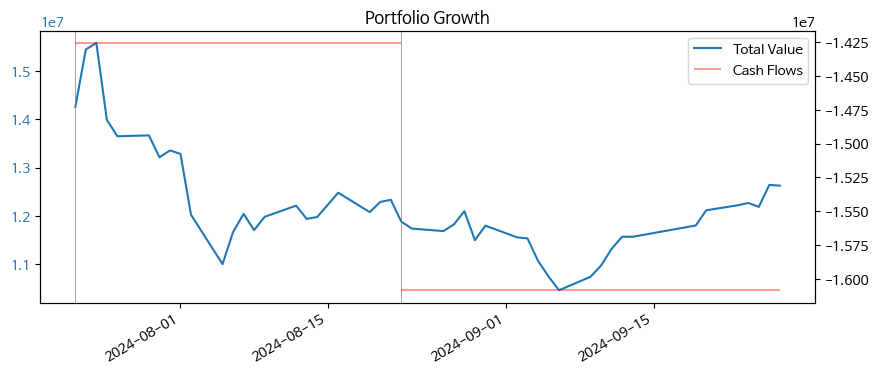

In [10]:
pf_k200.calc_value()

In [11]:
pf_k200.performance(metrics=metrics)

,KOSPI Momentum
start,2024-07-22
end,2024-09-27
total_return,-0.114269
cagr,-0.48392
calmar,-1.472339
max_drawdown,-0.328674
avg_drawdown,-0.328674
avg_drawdown_days,64.0
daily_vol,0.584844
daily_sharpe,-0.86841


In [12]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
kwargs_trs = dict(
    n_assets = 5,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
kw_liq = dict(
    assets_to_sell= '012450',
    #assets_to_sell= {'489790':40000},
    #assets_to_sell = {'012450':282500},
    hold= True
)
pf_k200.transaction_pipeline(**kwargs_trs, **kw_liq)

Liquidation prepared
5 assets selected by Total return from 2023-09-22 to 2024-09-20
Weights of assets determined by ERC.
Mean absolute error of weights: 4 %
Value 9,274,500, Profit -34.9%
Set save=True to save transaction record


name   price  transaction  net weight weight*
date       asset                                                       
2024-07-22 003230         삼양식품  637000            5    5  0.227   0.222
           267260     HD현대일렉트릭  314000            9    9  0.198   0.193
           042700        한미반도체  149000           20   20  0.205   0.211
           000150           두산  200000           13   13  0.189   0.187
           010120  LS ELECTRIC  222000           12   12  0.181   0.187
2024-08-22 267260     HD현대일렉트릭  318000           -1    8  0.192   0.184
           003230         삼양식품  509000            1    6  0.217   0.223
           012450    한화에어로스페이스  282500           10   10  0.206   0.206
           079550       LIG넥스원  193000           14   14  0.199   0.197
           042700        한미반도체  123100            1   21  0.186   0.189
           000150           두산  147600          -13    0    0.0     0.0
           010120  LS ELECTRIC  174400          -12    0    0.0     0.0
2024-09-27 267260     HD현대일렉트릭  319500           -1    7  0.196   0.197
           003230         삼양식품  538000           -2    4  0.200   0.189
           079550       LIG넥스원  210500           -3   11  0.198   0.204
           036460       한국가스공사   46350           50   50  0.197   0.204
           000100         유한양행  146100           16   16  0.209   0.206
           012450    한화에어로스페이스       0          -10    0      0       0
           042700        한미반도체  113000          -21    0      0       0

In [19]:
#pf_k200.performance(metrics=metrics2)
df_pf = pf_k200.get_historical()

Value 9,186,100, Profit -35.6% on 2024-09-24


### Event: split

In [18]:
pf_k200.record

name   price  transaction  net  weight  weight*
date       asset                                                         
2024-07-22 003230         삼양식품  637000            5    5   0.227    0.222
           267260     HD현대일렉트릭  314000            9    9   0.198    0.193
           042700        한미반도체  149000           20   20   0.205    0.211
           000150           두산  200000           13   13   0.189    0.187
           010120  LS ELECTRIC  222000           12   12   0.181    0.187
2024-08-22 267260     HD현대일렉트릭  318000           -1    8   0.192    0.184
           003230         삼양식품  509000            1    6   0.217    0.223
           012450    한화에어로스페이스  282500           10   10   0.206    0.206
           079550       LIG넥스원  193000           14   14   0.199    0.197
           042700        한미반도체  123100            1   21   0.186    0.189
           000150           두산  147600          -13    0   0.000    0.000
           010120  LS ELECTRIC  174400          -12    0   0.000    0.000

In [20]:
date = '2024-09-26'
save = True

pf_k200.copy_record(date, save=save)

Transaction record to 2024-08-22 loaded
All transactions saved to pf_k200_momentum_240926.csv


name   price  transaction  net  weight   weight*
date       asset                                                          
2024-07-22 003230         삼양식품  637000            5    5   0.227  0.222000
           267260     HD현대일렉트릭  314000            9    9   0.198  0.193000
           042700        한미반도체  149000           20   20   0.205  0.211000
           000150           두산  200000           13   13   0.189  0.187000
           010120  LS ELECTRIC  222000           12   12   0.181  0.187000
2024-08-22 267260     HD현대일렉트릭  318000           -1    8   0.192  0.184000
           003230         삼양식품  509000            1    6   0.217  0.223000
           012450    한화에어로스페이스  282500           10   10   0.206  0.206000
           079550       LIG넥스원  193000           14   14   0.199  0.197000
           042700        한미반도체  123100            1   21   0.186  0.189000
           000150           두산  147600          -13    0   0.000  0.000000
           010120  LS ELECTRIC  174400          -12    0   0.000  0.000000
2024-09-26 267260     HD현대일렉트릭  335000            0    8     NaN  0.187541
           003230         삼양식품  548000            0    6     NaN  0.230088
           012450    한화에어로스페이스  290000            0   10     NaN  0.202936
           079550       LIG넥스원  216000            0   14     NaN  0.211614
           042700        한미반도체  114200            0   21     NaN  0.167821

In [19]:
pf_k200.df_rec
date

NameError: name 'date' is not defined

### testing starts

In [21]:
def copy_record(self, date=None, save=True):
    """
    copy latest transaction of record with new price on date
    """
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_name = cols_record['name']
    col_prc = cols_record['prc']
    col_trs = cols_record['trs']
    col_net = cols_record['net']
    col_wgta = cols_record['wgta']

    # get transaction record
    df_rec = self._check_result()
    if df_rec is None:
        return None
    else:
        df_rec = self.liquidation.recover_record(df_rec, cols_record)

    # get universe and adjust copy date
    df_data = self.df_universe
    if date is not None:
        df_data = df_data.loc[:date]
    date = df_data.index.max()

    # check if copy date is latest
    if not self.check_new_transaction(date):
       return None

    # copy the latest transaction
    date_lt = df_rec.index.get_level_values(0).max()
    df_net = df_rec.loc[date_lt, [col_name, col_net]]
    df_net = df_net.loc[df_net[col_net]>0]
    df_net[col_trs] = 0

    # get price at the date
    df_prc = df_data.loc[date, df_net.index]
    df_net = df_net.join(df_prc.to_frame(col_prc)).assign(date=date)
    df_net = df_net.set_index(col_date, append=True).swaplevel()

    # calc actual weight
    wva = df_net[col_prc].mul(df_net[col_net]).rename(col_wgta)
    wa = wva / wva.groupby(col_date).sum()
    df_net = df_net.join(wa)

    # append copied as new transaction
    df_rec = pd.concat([df_rec, df_net])

    if save:
        self.save_transaction(df_rec)

    return df_rec

In [23]:
import pandas as pd

self = pf_k200
date = None


copy_record(self, date=date)

ERROR: check the date as no new transaction


In [42]:
pf_k200.record

name   price  transaction  net weight   weight*
date       asset                                                         
2024-07-19 003230         삼양식품  637000            5    5  0.227     0.222
           267260     HD현대일렉트릭  314000            9    9  0.198     0.193
           042700        한미반도체  149000           20   20  0.205     0.211
           000150           두산  200000           13   13  0.189     0.187
           010120  LS ELECTRIC  222000           12   12  0.181     0.187
2024-08-22 267260     HD현대일렉트릭  318000           -1    8  0.192     0.184
           003230         삼양식품  509000            1    6  0.217     0.223
           012450    한화에어로스페이스  282500           10   10  0.206     0.206
           079550       LIG넥스원  193000           14   14  0.199     0.197
           042700        한미반도체  123100            1   21  0.186     0.189
           000150           두산  147600          -13    0    0.0       0.0
           010120  LS ELECTRIC  174400          -12    0    0.0       0.0
2024-09-13 267260     HD현대일렉트릭  283500            0    8  0.197     0.201
           003230         삼양식품  510000           -2    4  0.199     0.181
           079550       LIG넥스원  207000           -3   11  0.198     0.202
           036460       한국가스공사   46200           50   50  0.198     0.205
           000100         유한양행  125000           19   19  0.208     0.211
           012450    한화에어로스페이스       0          -10    0      0         0
           042700        한미반도체   99500          -21    0      0         0
2024-09-27 267260     HD현대일렉트릭  319500            0    8    NaN  0.210945
           003230         삼양식품  538000            0    4    NaN  0.177603
           079550       LIG넥스원  210500            0   11    NaN  0.191097
           036460       한국가스공사   46350            0   50    NaN  0.191262
           000100         유한양행  146100            0   19    NaN  0.229093

### testing ends

## ETF

In [31]:
kwargs = dict(
    name='ETF6',
    file='pf_etf_static.csv',
    method_weigh='Equally', lookback=12, lag=5,
    path=path_tran,
    days_in_year=246,
    asset_names=assetnames_etf,
)

pf_etf = StaticPortfolio(df_etf, **kwargs)

period reset: 2021-12-15 ~ 2024-09-26
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-07-18 loaded
Transaction dates updated for profit/loss on the dates


Value 9,663,322, Profit -1.6% on 2024-09-26


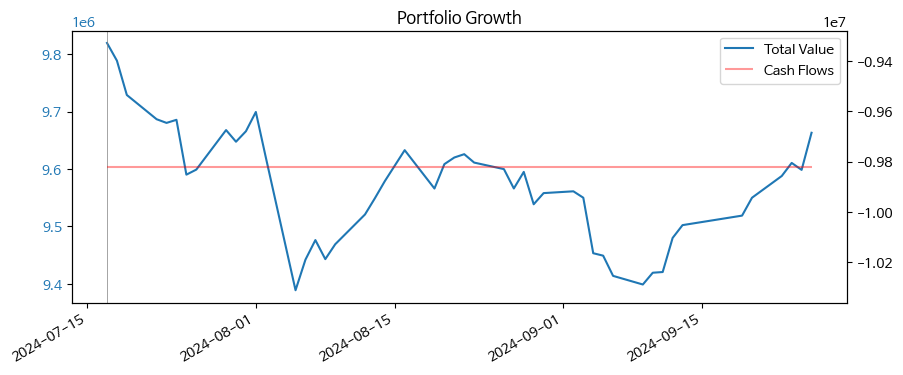

In [32]:
pf_etf.calc_value()

In [33]:
pf_etf.performance(metrics=metrics)

,ETF6
start,2024-07-17
end,2024-09-26
total_return,-0.015949
cagr,-0.079381
calmar,-1.807703
max_drawdown,-0.043912
avg_drawdown,-0.043912
avg_drawdown_days,70.0
daily_vol,0.087956
daily_sharpe,-0.936548


In [28]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [34]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
pf_etf.transaction_pipeline(**kwargs)

Liquidation set to None
6 assets from 2023-09-21 to 2024-09-20 prepared for weight analysis
Weights of assets determined by Equal weights.
Mean absolute error of weights: 1 %
Value 9,687,760, Profit -1.3%
Set save=True to save transaction record


name   price  transaction  net weight  \
date       asset                                                           
2024-07-17 069500             KODEX 200   39085           42   42  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112895           14   14  0.167   
           148070          KOSEF 국고채10년  114910           14   14  0.167   
           379800      KODEX 미국S&P500TR   17625           94   94  0.167   
           411060            ACE KRX금현물   15715          106  106  0.167   
           284430        KODEX 200미국채혼합   13440          124  124  0.167   
2024-09-26 069500             KODEX 200   35680            3   45  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114300            0   14  0.167   
           148070          KOSEF 국고채10년  116625            0   14  0.167   
           379800      KODEX 미국S&P500TR   17425           -1   93  0.167   
           411060            ACE KRX금현물   16220           -6  100  0.167   
           284430        KODEX 200미국채혼합   12895            2  126  0.167   

                  weight*  
date       asset           
2024-07-17 069500   0.167  
           273130   0.161  
           148070   0.164  
           379800   0.169  
           411060    0.17  
           284430    0.17  
2024-09-26 069500   0.165  
           273130   0.165  
           148070   0.168  
           379800   0.167  
           411060   0.167  
           284430   0.167

In [21]:
df_pf = df_pf.to_frame().join(pf_etf.get_historical(), how='outer')

## IRP

In [40]:
choice = ['K55301BU6139', 'K55206C95800']

In [41]:
kwargs = dict(
    name='TDF2',
    file='pf_tdf_static.csv',
    lookback=12, lag=5,
    path=path_tran,
    days_in_year=365,
    asset_names=assetnames_irp,
)

pf_irp = StaticPortfolio(df_irp[choice], **kwargs)
pf_irp.record

period reset: 2018-07-26 ~ 2024-08-25
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-06-19 loaded
Transaction dates updated for profit/loss on the dates


name  price  \
date       asset                                                            
2024-06-18 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1595   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1367   

                         transaction   net  weight  weight*  
date       asset                                             
2024-06-18 K55301BU6139         3132  3132     0.5      0.5  
           K55206C95800         3657  3657     0.5      0.5

Value 10,017,859, Profit 0.2% on 2024-08-25


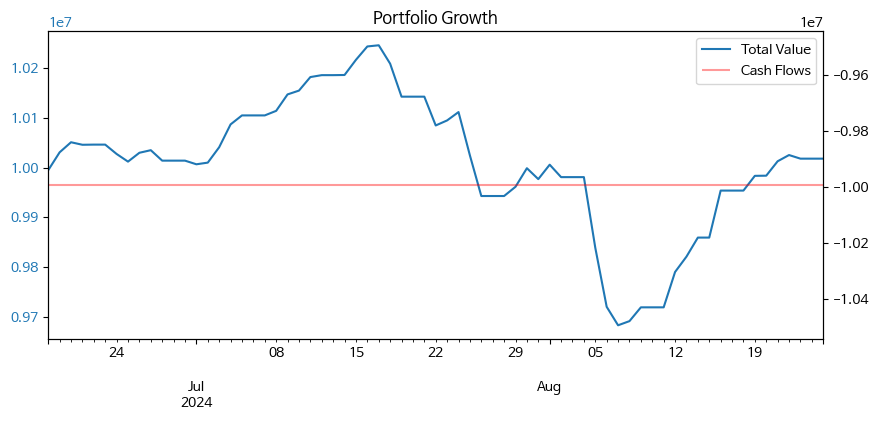

In [42]:
pf_irp.calc_value()

In [28]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [43]:
kwargs = dict(
    method_weigh = 'Equally', 
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
pf_irp.transaction_pipeline(**kwargs)

Liquidation set to None
2 assets from 2023-08-20 to 2024-08-20 prepared for weight analysis
Weights of assets determined by Equal weights.
Mean absolute error of weights: 0 %
Value 9,979,035, Profit -0.2%
Set save=True to save transaction record


name  price  \
date       asset                                                            
2024-06-18 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1595   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1367   
2024-08-25 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1576   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1379   

                         transaction   net weight weight*  
date       asset                                           
2024-06-18 K55301BU6139         3132  3132    0.5     0.5  
           K55206C95800         3657  3657    0.5     0.5  
2024-08-25 K55301BU6139           37  3169  0.500   0.500  
           K55206C95800          -36  3621  0.500   0.500

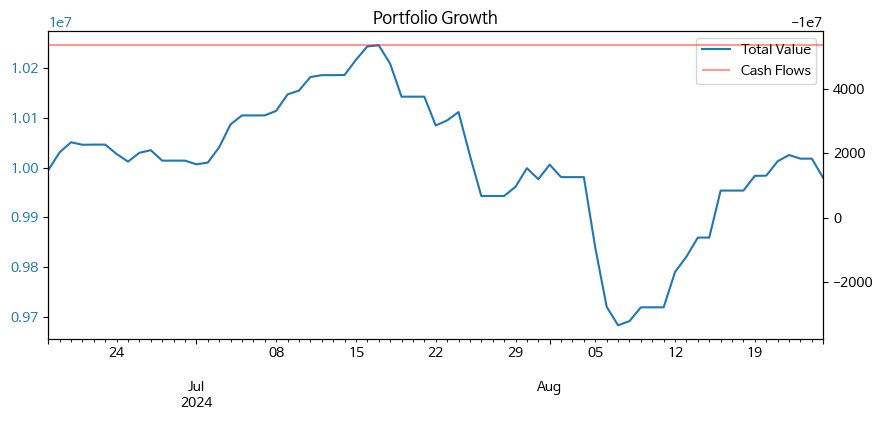

In [39]:
pf_irp.plot()

In [33]:
pf_irp.performance(metrics=metrics)

,TDF2
start,2024-06-18
end,2024-07-22
total_return,0.005385
cagr,0.059393
calmar,3.090541
max_drawdown,-0.019218
avg_drawdown,-0.011809
avg_drawdown_days,8.5
daily_vol,0.042799
daily_sharpe,0.950972


In [34]:
df_pf = df_pf.join(pf_irp.get_historical(), how='outer')
df_pf.tail()

,KOSPI Momentum,ETF6,TDF2
2024-07-18,NaN,9788950.0,1.020846e+07
2024-07-19,14255000.0,9729050.0,1.014225e+07
2024-07-20,NaN,NaN,1.014225e+07
2024-07-21,NaN,NaN,1.014225e+07
2024-07-22,13880500.0,9717710.0,1.004848e+07


## HANA

In [44]:
kwargs = dict(
    name='HANA4',
    file='pf_hana_static.csv',
    method_weigh='InvVol', lookback=12, lag=5,
    path=path_tran,
    days_in_year=365,
    asset_names=assetnames_hana,
)

pf_hana = StaticPortfolio(df_hana, **kwargs)

period reset: 2019-10-31 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year
KR5101888398: 12
KR5236AS4826: 12
KR5370AP9956: 12
K55306CV9946: 12
Transaction record to 2024-07-31 loaded
Transaction dates updated for profit/loss on the dates


Value 10,028,037, Profit 0.4% on 2024-07-31


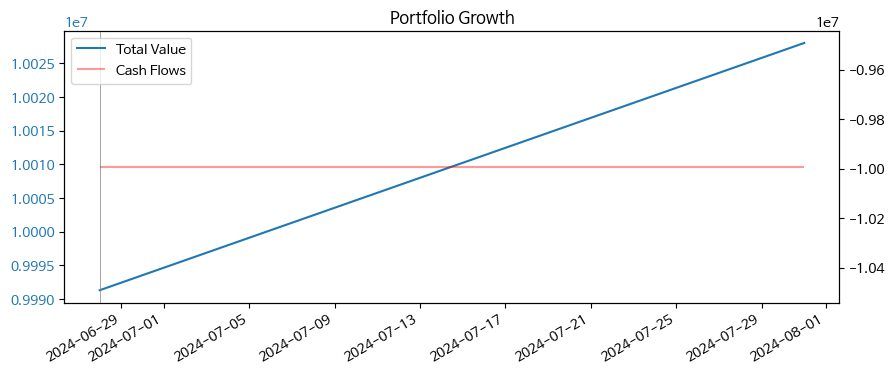

In [45]:
pf_hana.calc_value()

In [28]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [46]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
pf_hana.transaction_pipeline(**kwargs)

Liquidation set to None
4 assets from 2023-07-31 to 2024-06-28 prepared for weight analysis
ERROR: check the date as no new transaction
The profit from the most recent transaction: 0


name  price  \
date       asset                                                        
2024-06-28 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   1068   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   1260   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   1285   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   1151   

                         transaction   net  weight  weight*  
date       asset                                             
2024-06-28 KR5101888398         4699  4699   0.502    0.502  
           KR5236AS4826         1920  1920   0.242    0.242  
           KR5370AP9956         1448  1448   0.186    0.186  
           K55306CV9946          602   602   0.069    0.069

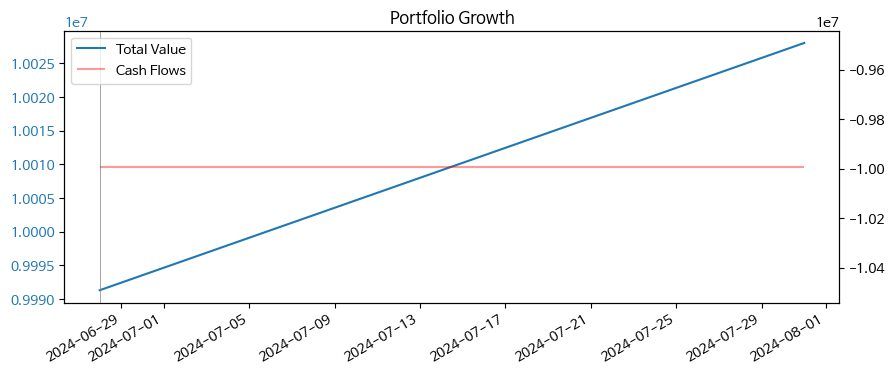

In [47]:
pf_hana.plot()

In [48]:
pf_hana.performance(metrics=metrics)

,HANA4
start,2024-06-28
end,2024-07-31
total_return,0.003675
cagr,0.041442
calmar,inf
max_drawdown,0.0
avg_drawdown,NaN
avg_drawdown_days,NaN
daily_vol,NaN
daily_sharpe,NaN


In [41]:
df_pf = df_pf.join(pf_hana.get_historical(), how='outer')

## Summary

In [42]:
ae = AssetEvaluator(df_pf, 242)
ae.get_stats(sort_by='monthly_sharpe', align_period=False)

KOSPI Momentum: 0
ETF6: 0
TDF2: 0
HANA4: 0


,KOSPI Momentum,ETF6,TDF2,HANA4
start,2024-07-19,2024-07-17,2024-06-18,2024-06-28
end,2024-07-22,2024-07-22,2024-07-22,2024-06-28
total_return,-0.026271,-0.01041,0.005385,NaN
cagr,-0.960888,-0.534419,0.059393,NaN
calmar,-36.575313,-51.334876,3.090541,NaN
max_drawdown,-0.026271,-0.01041,-0.019218,NaN
avg_drawdown,-0.026271,-0.01041,-0.011809,NaN
avg_drawdown_days,0.0,4.0,8.5,NaN
daily_vol,NaN,0.03957,0.042799,NaN
daily_sharpe,NaN,-22.163551,0.950972,NaN


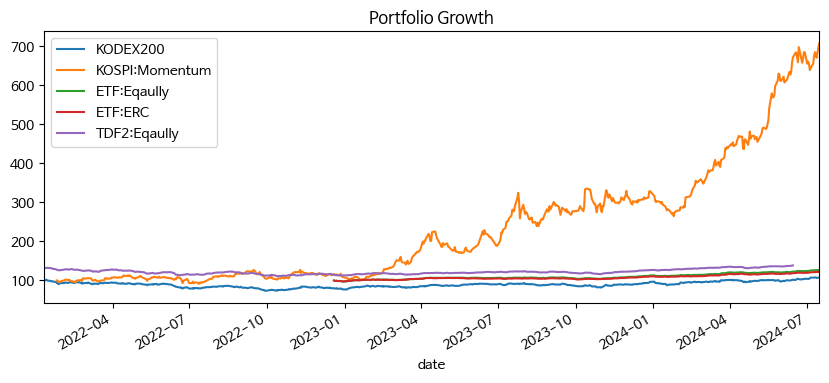

In [34]:
_ = ae.plot_historical()